In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', 100)

In [2]:
df = pd.read_csv('kc_house_data_train.csv')
print(df.shape)
df.head()

(17290, 22)


,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


In [3]:
# Get column names
column_names = df.columns
print(column_names)
# Get column data types
df.dtypes

Index(['Unnamed: 0', 'id', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [4]:
df.drop(columns=['Unnamed: 0', 'id','date'], inplace = True)

In [5]:
df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


In [7]:
df['price'].describe()

count    1.729000e+04
mean     5.407395e+05
std      3.733190e+05
min      7.500000e+04
25%      3.210000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

<AxesSubplot:>

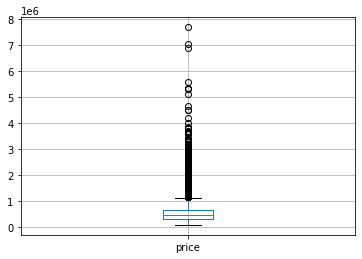

In [8]:
df.boxplot(['price'])

<AxesSubplot:xlabel='waterfront'>

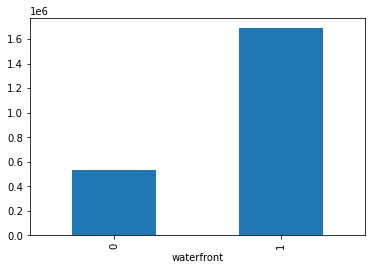

In [9]:
df.groupby('waterfront')['price'].mean().plot(kind='bar')

<AxesSubplot:xlabel='condition'>

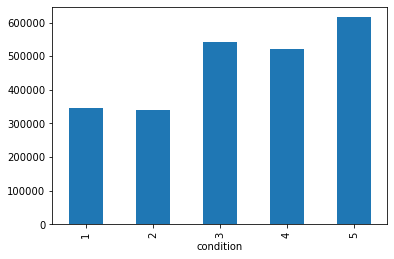

In [10]:
df.groupby('condition')['price'].mean().plot(kind='bar')

In [11]:
df.groupby('grade')['price'].mean()

grade
1     1.420000e+05
3     1.685000e+05
4     2.106386e+05
5     2.438372e+05
6     3.026820e+05
7     4.025267e+05
8     5.430105e+05
9     7.741618e+05
10    1.072903e+06
11    1.507967e+06
12    2.314347e+06
13    4.002727e+06
Name: price, dtype: float64

<AxesSubplot:xlabel='view'>

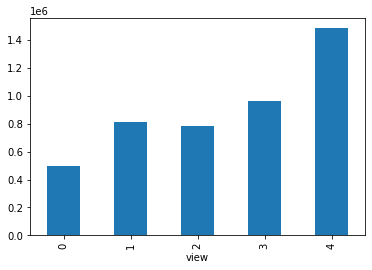

In [12]:
df.groupby('view')['price'].mean().plot(kind='bar')

In [13]:
df['floors'].value_counts()

1.0    8606
2.0    6538
1.5    1524
3.0     475
2.5     140
3.5       7
Name: floors, dtype: int64

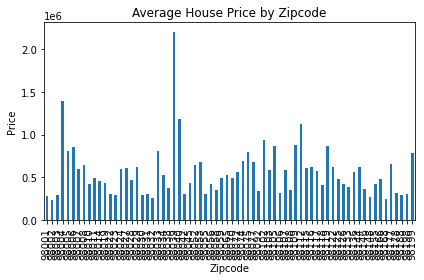

In [78]:
ax = df.groupby('zipcode')['price'].mean().plot(kind='bar')
ax.set_title('Average House Price by Zipcode')
ax.set_xlabel('Zipcode')
ax.set_ylabel('Price')

plt.tight_layout()
plt.show()

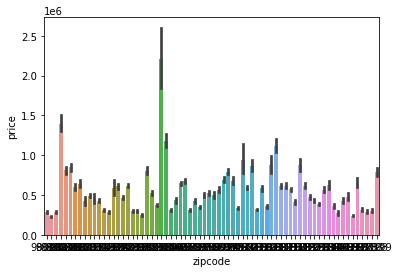

In [19]:
ax = sns.barplot(data=df, x="zipcode", y="price")

<AxesSubplot:xlabel='bedrooms'>

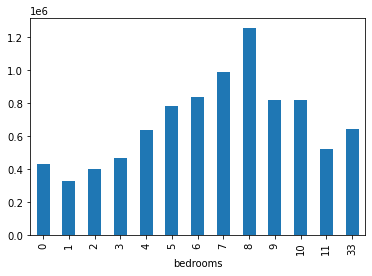

In [58]:
#df = df[df['bedrooms'] < 20]
df.groupby('bedrooms')['price'].mean().plot(kind='bar')

In [59]:
df.groupby('yr_built')['price'].mean()

yr_built
1900    588646.242857
1901    555805.680000
1902    676645.454545
1903    480985.472222
1904    599607.055556
            ...      
2011    537078.900000
2012    525477.531746
2013    673810.053254
2014    691102.339956
2015    760906.034483
Name: price, Length: 116, dtype: float64

In [60]:
#Selecting all houses built in or after 1990.
post90 = df[df['yr_built'] >= 1990]

<AxesSubplot:xlabel='yr_built'>

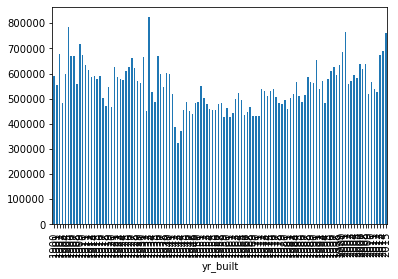

In [74]:
df.groupby('yr_built')['price'].mean().plot(kind='bar')

<AxesSubplot:xlabel='bedrooms'>

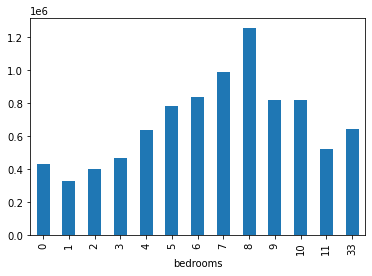

In [71]:
df.groupby('bedrooms')['price'].mean().plot(kind='bar')

In [63]:
df['sqft_range'] = pd.cut(df['sqft_living'], bins=[0, 1000, 2000, 3000, 4000, 5000, np.inf])

Text(0.5, 1.0, 'Average House Price by Sqft')

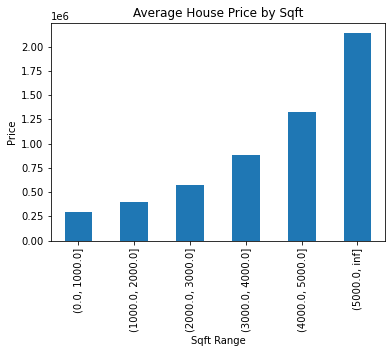

In [84]:
ax = df.groupby('sqft_range')['price'].mean().plot(kind='bar')
ax.set_xlabel('Sqft Range')
ax.set_ylabel('Price')
ax.set_title('Average House Price by Sqft')

In [65]:
df.groupby('sqft_range')['price'].mean()

sqft_range
(0.0, 1000.0]       2.960697e+05
(1000.0, 2000.0]    3.992959e+05
(2000.0, 3000.0]    5.764738e+05
(3000.0, 4000.0]    8.782635e+05
(4000.0, 5000.0]    1.327722e+06
(5000.0, inf]       2.134886e+06
Name: price, dtype: float64

In [66]:
df['sqft_percentage'] = df['sqft_living'] / df['sqft_lot']

In [67]:
#Converting yr_built column into datetime.
df['dt_yr_built'] = pd.to_datetime(df['yr_built'].astype(str), format='%Y')

In [68]:
df['decade_built'] = ((df['dt_yr_built'].dt.year//10)*10)

Text(0.5, 1.0, 'Average House Price by Decade')

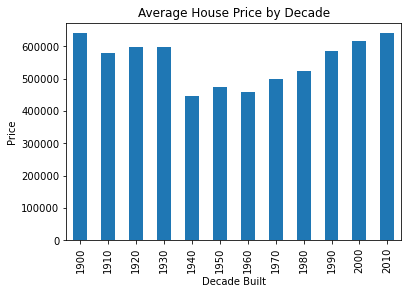

In [80]:
#Comparing the avg price of houses by decade.
ax = df.groupby('decade_built')['price'].mean().plot(kind='bar')
ax.set_xlabel('Decade Built')
ax.set_ylabel('Price')
ax.set_title('Average House Price by Decade')

In [70]:
df.groupby('decade_built')['price'].mean()

decade_built
1900    640229.312621
1910    580098.425499
1920    597525.566253
1930    597864.548463
1940    447232.918919
1950    474659.752257
1960    459404.440222
1970    499863.001114
1980    524219.988063
1990    584056.096218
2000    617365.948857
2010    640020.592065
Name: price, dtype: float64

In [ ]:
word = 'zipcode_'
zipcode_list = df['zipcode'].unique().astype(str).tolist()
[word + x for x in zipcode_list]
len(zipcode_list)

In [ ]:
df = pd.get_dummies(df, columns = ['zipcode'], drop_first = True)

In [ ]:
# Get column names
column_names = df.columns
print(column_names)
len(column_names)

In [ ]:
df = df[df['sqft_living'] < 7000]

In [ ]:
df = df[df['sqft_lot'] < 500000]

In [ ]:
df = df[(df['bathrooms'] >= 1) &(df['bathrooms'] <=6)]

In [ ]:
df =df[(df['bedrooms'] >=1) & (df['bedrooms'] <= 10) ]

In [ ]:
df = df[df['sqft_lot15'] < 500000]

In [ ]:
model_data = ['yr_built', 'sqft_living', 'sqft_lot', 'sqft_percentage', 'grade', 'condition', 'floors', 
              'bathrooms','bedrooms','sqft_living15', 'sqft_lot15',
            'zipcode_98058','zipcode_98115','zipcode_98006', 'zipcode_98034', 'zipcode_98052', 'zipcode_98031', 'zipcode_98007', 
            'zipcode_98199', 'zipcode_98027', 'zipcode_98119', 'zipcode_98122', 'zipcode_98155','zipcode_98055','zipcode_98118', 'zipcode_98014',
            'zipcode_98059', 'zipcode_98004', 'zipcode_98053', 'zipcode_98072', 'zipcode_98133', 'zipcode_98092','zipcode_98074',
            'zipcode_98125', 'zipcode_98045','zipcode_98106','zipcode_98022', 'zipcode_98177', 'zipcode_98008', 'zipcode_98002',
            'zipcode_98040', 'zipcode_98029', 'zipcode_98042','zipcode_98065','zipcode_98056','zipcode_98144','zipcode_98188',
            'zipcode_98109', 'zipcode_98010', 'zipcode_98075', 'zipcode_98198', 'zipcode_98030', 'zipcode_98105','zipcode_98023',
            'zipcode_98028', 'zipcode_98112', 'zipcode_98038', 'zipcode_98116', 'zipcode_98103', 'zipcode_98178','zipcode_98168','zipcode_98005',
            'zipcode_98077','zipcode_98146','zipcode_98011','zipcode_98126','zipcode_98108', 'zipcode_98136', 'zipcode_98033',
            'zipcode_98003', 'zipcode_98117','zipcode_98107','zipcode_98019','zipcode_98102','zipcode_98032', 'zipcode_98148',
 'zipcode_98166', 'zipcode_98070', 'zipcode_98024','zipcode_98039']
df[model_data].corr()

In [ ]:
mlr_model = ols(formula='price~yr_built+sqft_living+sqft_lot+grade+condition+sqft_percentage+bathrooms+bedrooms+zipcode_98058+zipcode_98115+zipcode_98006+zipcode_98034+zipcode_98052+zipcode_98031+zipcode_98007+zipcode_98199+zipcode_98027+zipcode_98119+zipcode_98122+zipcode_98155+zipcode_98055+zipcode_98118+zipcode_98014+zipcode_98059+zipcode_98004+zipcode_98053+zipcode_98072+zipcode_98133+zipcode_98092+zipcode_98074+zipcode_98125+zipcode_98045+zipcode_98106+zipcode_98022+zipcode_98177+zipcode_98008+zipcode_98002+zipcode_98040+zipcode_98029+zipcode_98042+zipcode_98011+zipcode_98065+zipcode_98056+zipcode_98144+zipcode_98188+zipcode_98109+zipcode_98010+zipcode_98075+zipcode_98198+zipcode_98030+zipcode_98105+zipcode_98023+zipcode_98028+zipcode_98112+zipcode_98038+zipcode_98116+zipcode_98103+zipcode_98178+zipcode_98168+zipcode_98005+zipcode_98077+zipcode_98146+zipcode_98011+zipcode_98126+zipcode_98108+zipcode_98136+zipcode_98033+zipcode_98003+zipcode_98117+zipcode_98107+zipcode_98019+zipcode_98102+zipcode_98032+zipcode_98148+zipcode_98166+zipcode_98070+zipcode_98024+zipcode_98039', data=df).fit()
mlr_model.summary()

In [ ]:
df.head()

In [ ]:
# fit a model
#import the class
from sklearn.linear_model import LinearRegression

#instantiate a linear regression object
lm = LinearRegression()

#fit the linear regression to the data
lm.fit(df[model_data], df['price'])

In [ ]:
print(lm.intercept_)
print(lm.coef_)

In [ ]:
y_pred = lm.predict(df[model_data])

In [ ]:
y_pred[:100]
## The line / model
plt.scatter( df['price'], y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
mae = mean_absolute_error(df['price'], y_pred)
mse = mean_squared_error(df['price'], y_pred)
rmse = np.sqrt(mse)

print(mae)
print(rmse)

In [ ]:
#Plotting the Residuals
sns.residplot(x=y_pred, y=df['price'], lowess=True, color="g")

In [ ]:
residuals =  df['price']- y_pred

In [ ]:
sns.distplot(residuals, kde=True, rug=True);

In [ ]:
from scipy import stats


In [ ]:
print (stats.shapiro(residuals))

In [ ]:
import statsmodels.api as sm 

fig = sm.qqplot(residuals,line='s')
plt.show()

In [ ]:
df['log_price'] = np.log(df['price'])


In [ ]:
df.hist(column=['log_price'], bins=20, density =True)

In [ ]:
#instantiate a linear regression object
lm_log = LinearRegression()

#fit the linear regression to the data
lm_log.fit(df[model_data], df['log_price'])

In [ ]:
y_log_pred = lm_log.predict(df[model_data])

In [ ]:
sns.residplot(y_log_pred, df['log_price'], lowess=True, color="g")

In [ ]:
log_residuals =  df['log_price']- y_log_pred

In [ ]:
sns.distplot(log_residuals, kde=True, rug=True);

In [ ]:
print (stats.shapiro(log_residuals))


In [ ]:
fig = sm.qqplot(log_residuals,line='s')
plt.show()

In [ ]:
#break the colums in to groups to plot 4 on a row at a time
n = 4
row_groups= [model_data[i:i+n] for i in range(0, len(model_data), n) ]

In [ ]:
for i in row_groups:
    pp = sns.pairplot(data=df, y_vars=['price'],x_vars=i, kind="reg", height=3)

In [ ]:
df['sqft_lot'].value_counts()

In [ ]:
#df.groupby('zipcode').agg({'sqft_living15': np.mean, 'sqft_lot15': np.mean, 'price': np.mean}).plot(kind='bar')

In [ ]:
df['log_yr_built'] = np.log(df['yr_built'])

In [ ]:
df['log_sqft_living'] = np.log(df['sqft_living'])

In [ ]:
df['log_sqft_lot'] = np.log(df['sqft_lot'])

In [ ]:
df['log_sqft_percentage'] = np.log(df['sqft_percentage'])

In [ ]:
df['log_grade'] = np.log(df['grade'])

In [ ]:
df['log_condition'] = np.log(df['condition'])

In [ ]:
df['log_floors'] = np.log(df['floors'])

In [ ]:
#df['log_zipcode'] = np.log(df['zipcode'])

In [ ]:
df['log_bathrooms'] = np.log(df['bathrooms'])

In [ ]:
df['log_bedrooms'] = np.log(df['bedrooms'])

In [ ]:
df['log_sqft_living15'] = np.log(df['sqft_living15'])

In [ ]:
df['log_sqft_lot15'] = np.log(df['sqft_lot15'])

In [ ]:
df.head()

In [ ]:
log_model_data = ['log_yr_built', 'log_sqft_living', 'log_sqft_lot', 'log_sqft_percentage', 'log_grade', 'log_condition', 'log_floors', 'log_bathrooms','log_bedrooms','log_sqft_living15', 'log_sqft_lot15']
df[log_model_data].corr()

In [ ]:
log_mlr_model = ols(formula='log_price~log_yr_built+log_sqft_living+log_sqft_lot+log_grade+log_condition+log_sqft_percentage+log_bathrooms+log_bedrooms+log_sqft_living15+log_sqft_lot15', data=df).fit()
log_mlr_model.summary()

In [ ]:
# fit a model
#import the class
from sklearn.linear_model import LinearRegression

#instantiate a linear regression object
lm = LinearRegression()

#fit the linear regression to the data
lm.fit(df[log_model_data], df['log_price'])

In [ ]:
print(lm.intercept_)
print(lm.coef_)

In [ ]:
y_pred = lm.predict(df[log_model_data])

In [ ]:
y_pred[:100]
## The line / model
plt.scatter( df['log_price'], y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
mae = mean_absolute_error(df['log_price'], y_pred)
mse = mean_squared_error(df['log_price'], y_pred)
rmse = np.sqrt(mse)

print(mae)
print(rmse)

In [ ]:
#Plotting the Residuals
sns.residplot(x=y_pred, y=df['log_price'], lowess=True, color="g")

In [ ]:
log_residuals =  df['log_price']- y_pred

In [ ]:
sns.distplot(log_residuals, kde=True, rug=True);

In [ ]:
print (stats.shapiro(log_residuals))


In [ ]:
fig = sm.qqplot(log_residuals,line='s')
plt.show()

In [ ]:
#break the colums in to groups to plot 4 on a row at a time
n = 4
row_groups= [log_model_data[i:i+n] for i in range(0, len(log_model_data), n) ]

In [ ]:
for i in row_groups:
    pp = sns.pairplot(data=df, y_vars=['log_price'],x_vars=i, kind="reg", height=3)